1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [76]:
import numpy as np

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
X = np.array(zp)
y = np.array(ks)


###### Проведем расчет с интерсептом

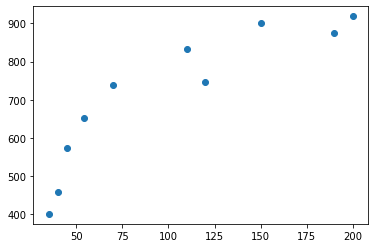

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X, y)
plt.show()

In [78]:
b = (np.mean(X*y)-np.mean(X)*np.mean(y))/(np.mean(X**2)-np.mean(X)**2)
b

2.620538882402765

In [79]:
a = np.mean(y)-b*np.mean(X)
a

444.1773573243596

In [80]:
y_hat1 = a + b*X
y_hat1, y

(array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
        548.99891262, 627.61507909, 585.68645697, 837.25818968,
        758.64202321, 732.43663439]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

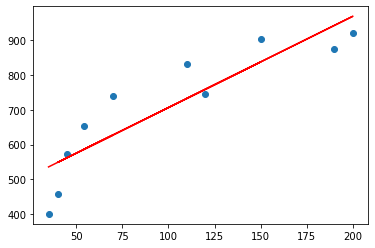

In [81]:
plt.scatter(X,y)
plt.plot(X, a+b*X, color='r')
plt.show()

###### Теперь, используя матричный метод, проведем рассчет без интерсепта

In [82]:
X = X.reshape((10, 1))
y = y.reshape((10, 1))

In [83]:
b2 = np.linalg.inv(X.T @ X) @ X.T @ y
b2

array([[5.88982042]])

In [84]:
y_hat2 = b2*X
y_hat2, y

(array([[ 206.1437147 ],
        [ 265.04191891],
        [1119.06587983],
        [1177.96408403],
        [ 235.59281681],
        [ 412.28742941],
        [ 318.05030269],
        [ 883.47306302],
        [ 706.77845042],
        [ 647.88024621]]),
 array([[401],
        [574],
        [874],
        [919],
        [459],
        [739],
        [653],
        [902],
        [746],
        [832]]))

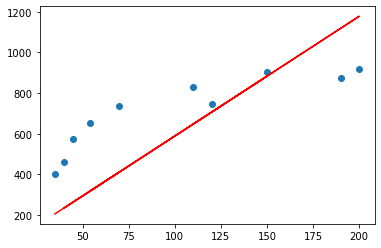

In [85]:
plt.scatter(X,y)
plt.plot(X, b2*X, color='r')
plt.show()

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [86]:
B1=0.1
n=len(X)

In [87]:
def mse_(B1, y=y, X=X, n=n):
    return np.sum((B1*X-y)**2)/n

In [88]:
alpha = 1e-6

In [89]:
r = 1001

In [90]:
for i in range(r):
    B1 -=alpha*(2/n)*np.sum((B1*X-y)*X)
    if i%100==0:
        print('Iteration: {i}, B1={B1}, mse={mse}'.format(i=i, B1=B1, mse=mse_(B1)))

Iteration: 0, B1=0.25952808, mse=493237.7212546963
Iteration: 100, B1=5.54537842245223, mse=58151.31823171113
Iteration: 200, B1=5.868748638669329, mse=56522.97550129376
Iteration: 300, B1=5.888531320728348, mse=56516.88130936019
Iteration: 400, B1=5.8897415574471985, mse=56516.85850140053
Iteration: 500, B1=5.889815595583751, mse=56516.858416040064
Iteration: 600, B1=5.889820124983314, mse=56516.85841572062
Iteration: 700, B1=5.889820402076462, mse=56516.85841571941
Iteration: 800, B1=5.88982041902807, mse=56516.8584157194
Iteration: 900, B1=5.889820420065112, mse=56516.85841571941
Iteration: 1000, B1=5.8898204201285544, mse=56516.85841571941


In [91]:
B1 = 5.889820402076462

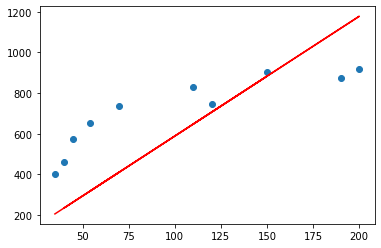

In [92]:
plt.scatter(X,y)
plt.plot(X, B1*X, color='r')
plt.show()